# EDA - Predict the Success of Bank telemarketing

-------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [5]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


## Dataset Description

### Features
- **last contact date**: The date of the last contact with the individual.
- **age**: Age of the individual (ranging from 18 to 95).
- **job**: Occupation; contains some missing values.
- **marital**: Marital status (e.g., married, single).
- **education**: Education level; contains some missing values.
- **default**: Indicates if the individual has credit in default.
- **balance**: Account balance, with values ranging from negative to over 100,000.
- **housing**: Indicates if the individual has a housing loan.
- **loan**: Indicates if the individual has a personal loan.
- **contact**: Type of contact communication, with some missing values.
- **duration**: Duration of the last contact (in seconds), with some instances of zero values.
- **campaign**: Number of contacts during the campaign.
- **pdays**: Days since the individual was last contacted (or -1 if never contacted).
- **previous**: Number of contacts before the current campaign.
- **poutcome**: Outcome of the previous marketing campaign; contains many missing values.
- **target**: Target variable indicating the success of the campaign ("yes" or "no").

### Key Observations
- **Missing Values**: Columns such as `job`, `education`, `contact`, and `poutcome` contain missing values.
- **High Range in Balance**: The `balance` column shows significant variation, with both negative and high positive values, indicating diverse financial statuses.
- **Campaign Interaction**: Some clients were contacted multiple times, with `campaign` values as high as 63 contacts.
- **Duration**: Contact duration varies widely, with a mean of 439 seconds but a high standard deviation, indicating varied lengths of engagement.


## Data Cleaning

In [6]:
missing_values = df.isnull().sum()

In [7]:
missing_values

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

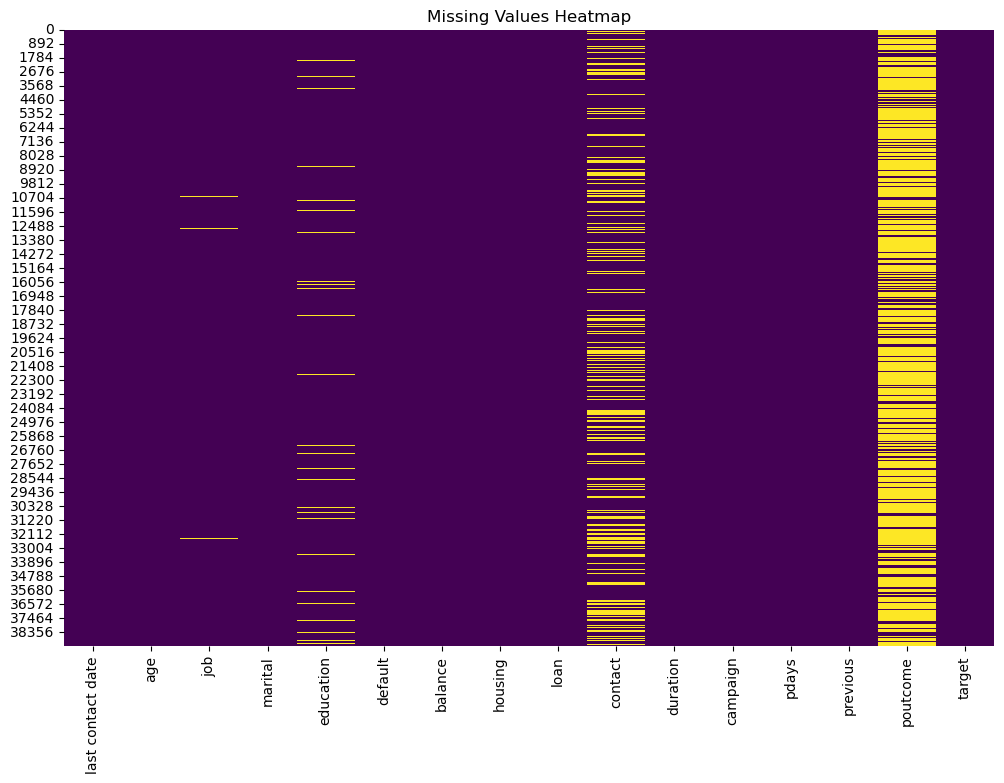

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
df['contact'] = df['contact'].replace('', 'unknown')
df['poutcome'] = df['poutcome'].replace('', 'unknown')

## Binning

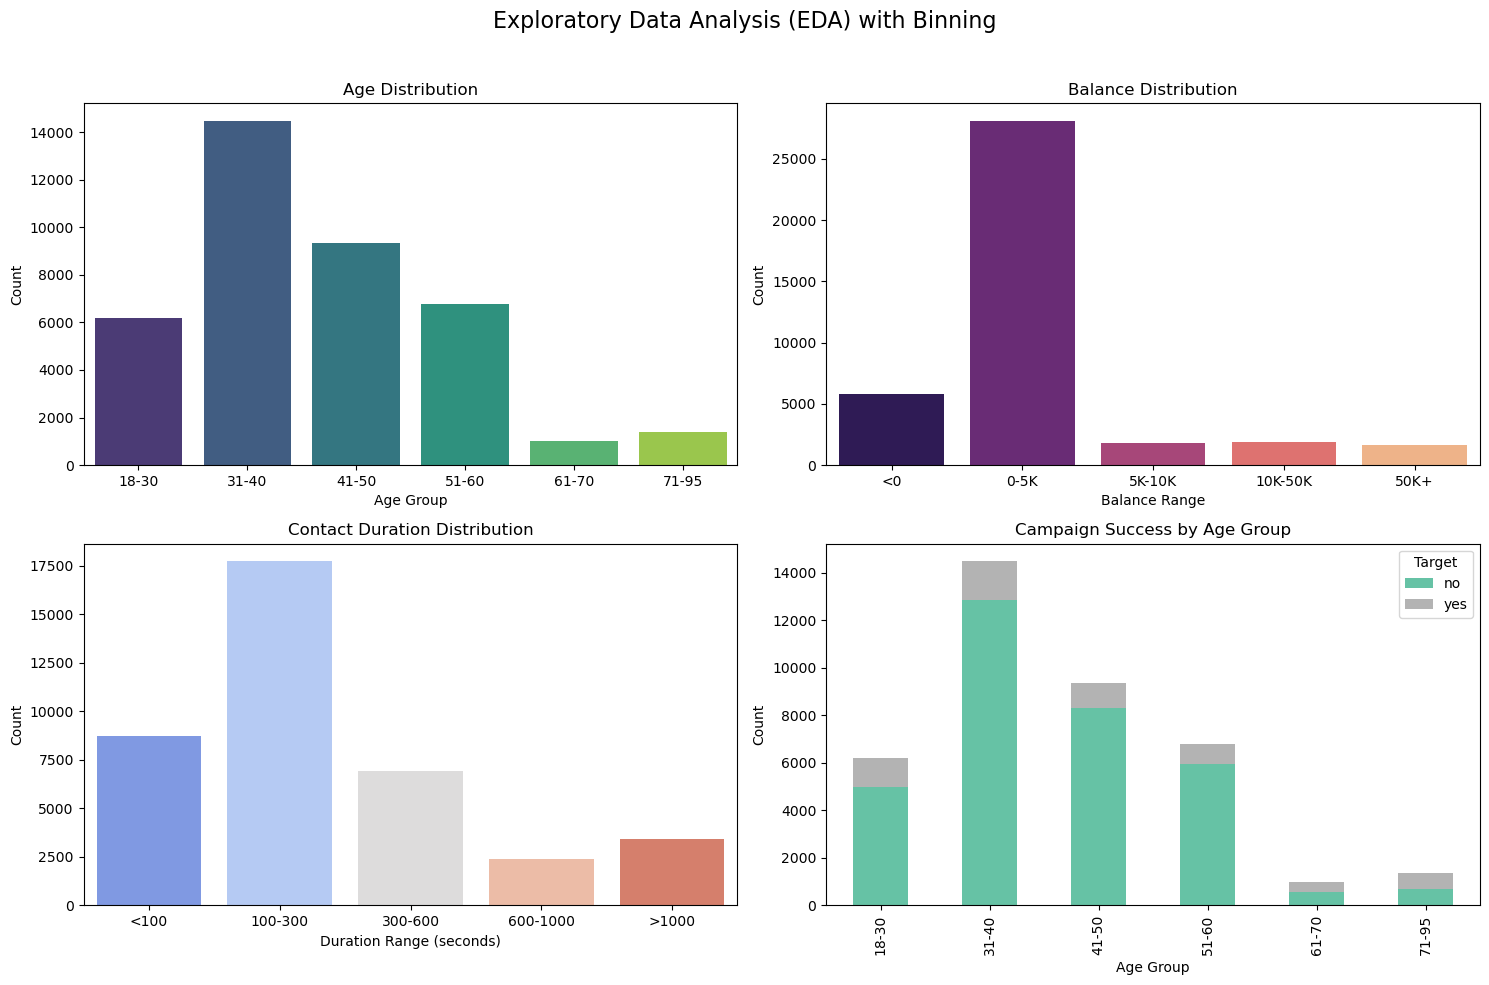

In [10]:
df['age_bin'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 95], 
                       labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-95'])
age_counts = df['age_bin'].value_counts().sort_index()

df['balance_bin'] = pd.cut(df['balance'], bins=[-10000, 0, 5000, 10000, 50000, 102127], 
                           labels=['<0', '0-5K', '5K-10K', '10K-50K', '50K+'])
balance_counts = df['balance_bin'].value_counts().sort_index()

duration_bins = pd.cut(df['duration'], bins=[0, 100, 300, 600, 1000, 5000], 
                       labels=['<100', '100-300', '300-600', '600-1000', '>1000'])
duration_counts = duration_bins.value_counts().sort_index()

age_target_counts = df.groupby(['age_bin', 'target'], observed=False).size().unstack().fillna(0)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Exploratory Data Analysis (EDA) with Binning", fontsize=16)

sns.barplot(x=age_counts.index, y=age_counts.values, ax=axs[0, 0], palette="viridis", hue=None, legend=False)
axs[0, 0].set_title("Age Distribution")
axs[0, 0].set_xlabel("Age Group")
axs[0, 0].set_ylabel("Count")

sns.barplot(x=balance_counts.index, y=balance_counts.values, ax=axs[0, 1], palette="magma", hue=None, legend=False)
axs[0, 1].set_title("Balance Distribution")
axs[0, 1].set_xlabel("Balance Range")
axs[0, 1].set_ylabel("Count")

sns.barplot(x=duration_counts.index, y=duration_counts.values, ax=axs[1, 0], palette="coolwarm", hue=None, legend=False)
axs[1, 0].set_title("Contact Duration Distribution")
axs[1, 0].set_xlabel("Duration Range (seconds)")
axs[1, 0].set_ylabel("Count")

age_target_counts.plot(kind="bar", stacked=True, ax=axs[1, 1], colormap="Set2")
axs[1, 1].set_title("Campaign Success by Age Group")
axs[1, 1].set_xlabel("Age Group")
axs[1, 1].set_ylabel("Count")
axs[1, 1].legend(title="Target")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Perform the T-test
from scipy.stats import ttest_ind

group1 = df[df['target'] == 'yes']['balance']
group2 = df[df['target'] == 'no']['balance']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.2e}") # very small p-value


T-statistic: 32.63
P-value: 7.26e-216


### Testing Balance Influence on Campaign Success

- **Null Hypothesis (H₀)**: Customers’ average balance does not differ significantly between those who participated in the campaign successfully and those who didn’t.
- **Alternative Hypothesis (H₁)**: There is a significant difference in the average balance between customers who participated successfully and those who didn’t.

#### Test Type
- **Two-sample t-test (independent)**

#### Reason
Since balance is a continuous variable, a t-test can assess whether there is a significant difference in the mean balance for customers who had campaign success vs. those who didn’t.


In [12]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['balance'], df['target'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test - Chi2 statistic:", chi2_stat, "P-value:", p_value)

Chi-square test - Chi2 statistic: 16410.685458955882 P-value: 0.0


### Campaign Success and Customer Balances

- **Null Hypothesis (H₀)**: Balance and campaign success are independent of each other.
- **Alternative Hypothesis (H₁)**: There is an association between balance and campaign success.

#### Test Type
- **Chi-square test of independence** (if balance is categorized, e.g., low, medium, high)
- **Logistic regression** (if predicting the probability of campaign success based on continuous balance values)

#### Reason
If balance is divided into categories, the chi-square test can reveal if there's an association between balance levels and campaign success. Logistic regression would be suitable if the goal is to predict the likelihood of success based on the balance.


## Univariate Analysis

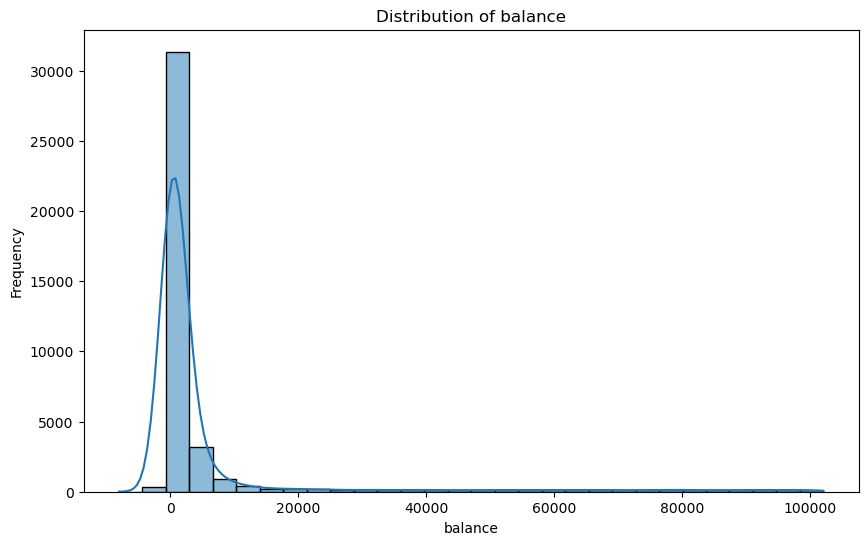

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title(f"Distribution of balance")
plt.xlabel('balance')
plt.ylabel("Frequency")
plt.show()

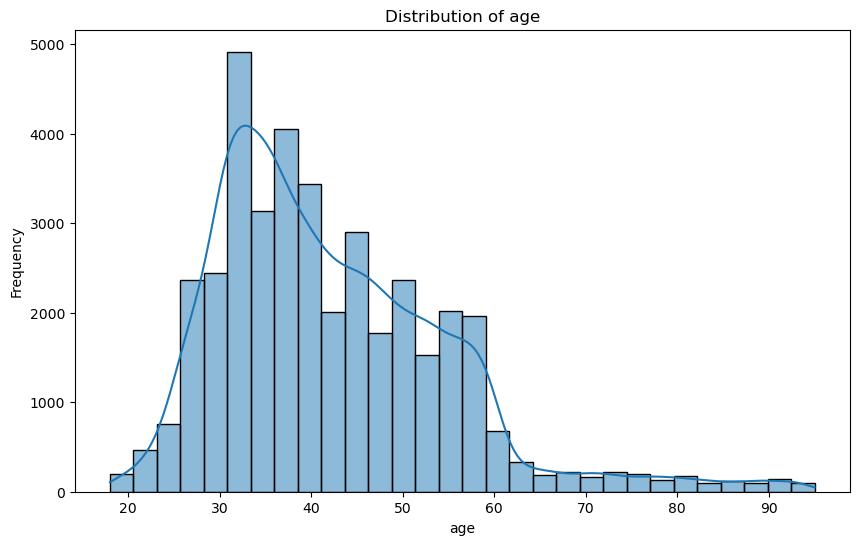

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title(f"Distribution of age")
plt.xlabel('age')
plt.ylabel("Frequency")
plt.show()

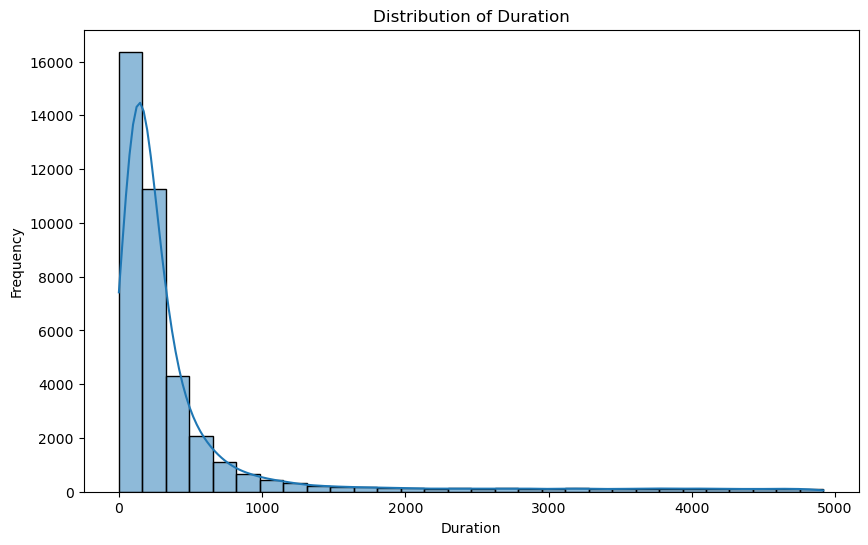

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, bins=30)
plt.title(f"Distribution of Duration")
plt.xlabel('Duration')
plt.ylabel("Frequency")
plt.show()

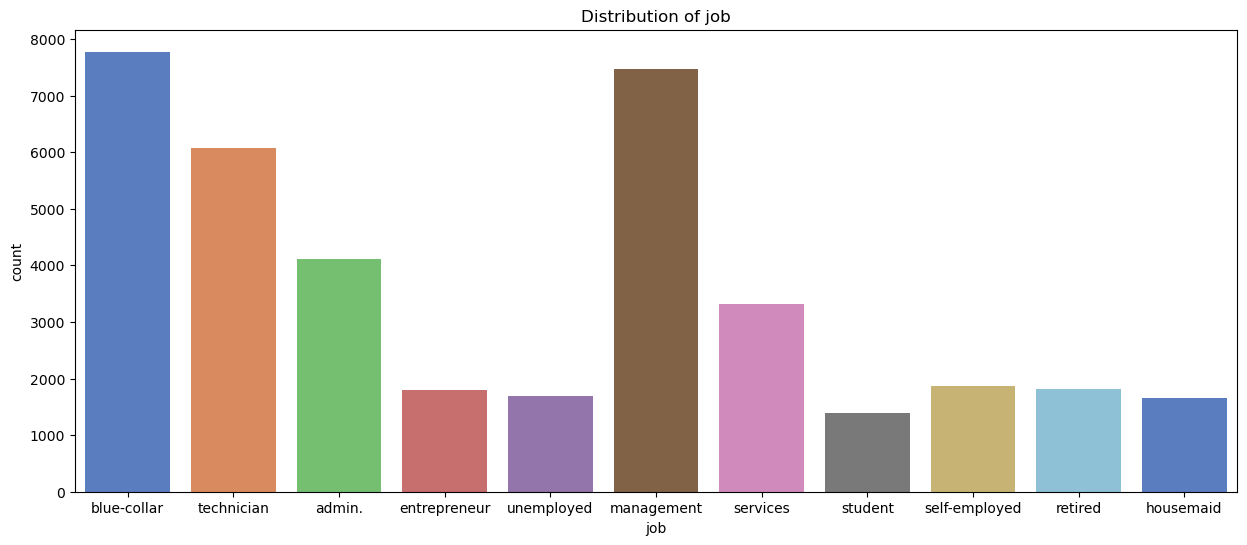

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(x='job', data=df, palette="muted")
plt.title(f"Distribution of job")
plt.show()

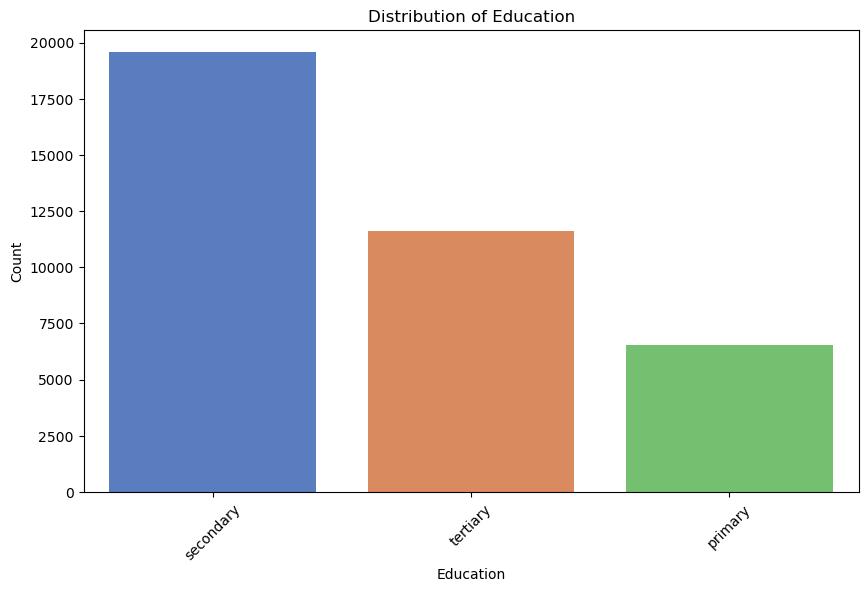

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette="muted")
plt.title(f"Distribution of Education")
plt.xlabel('Education')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

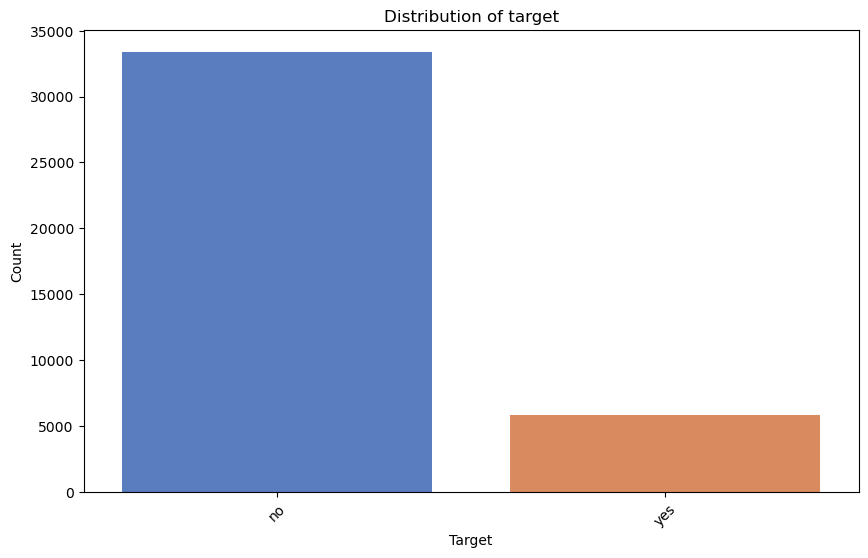

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette="muted")
plt.title(f"Distribution of target")
plt.xlabel('Target')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis

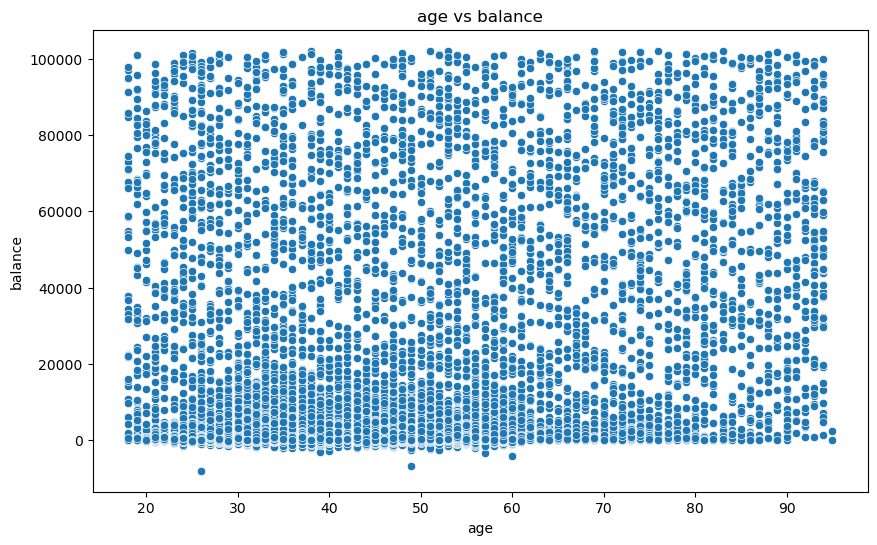

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title(f"age vs balance")
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

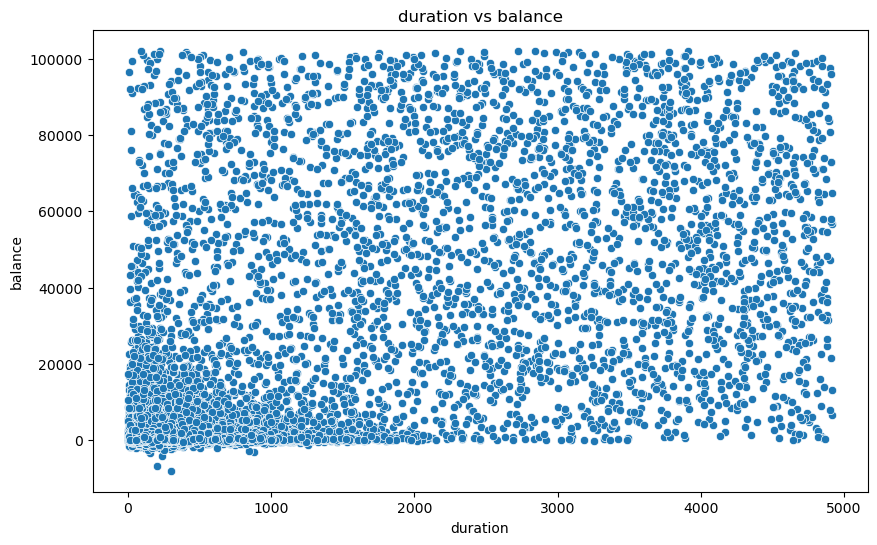

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='balance',data=df)
plt.title(f"duration vs balance")
plt.xlabel('duration')
plt.ylabel('balance')
plt.show()

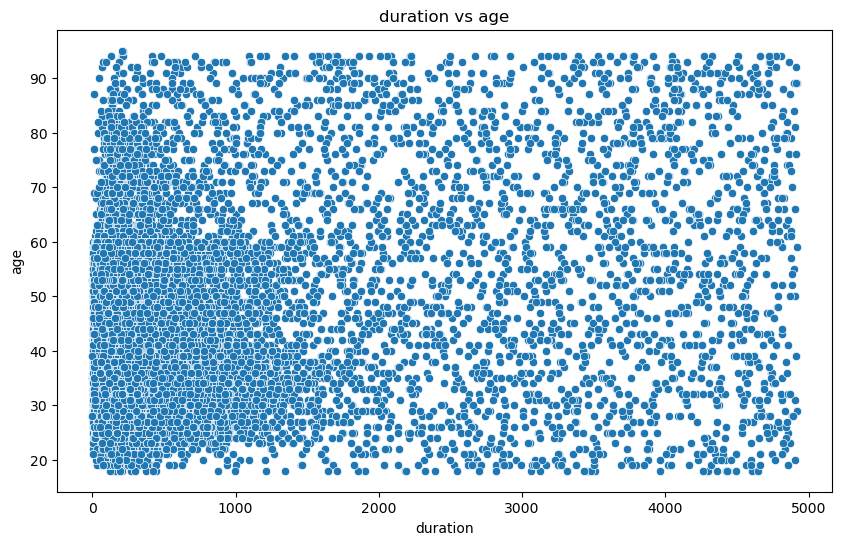

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='age', data=df)
plt.title(f"duration vs age")
plt.xlabel('duration')
plt.ylabel('age')
plt.show()

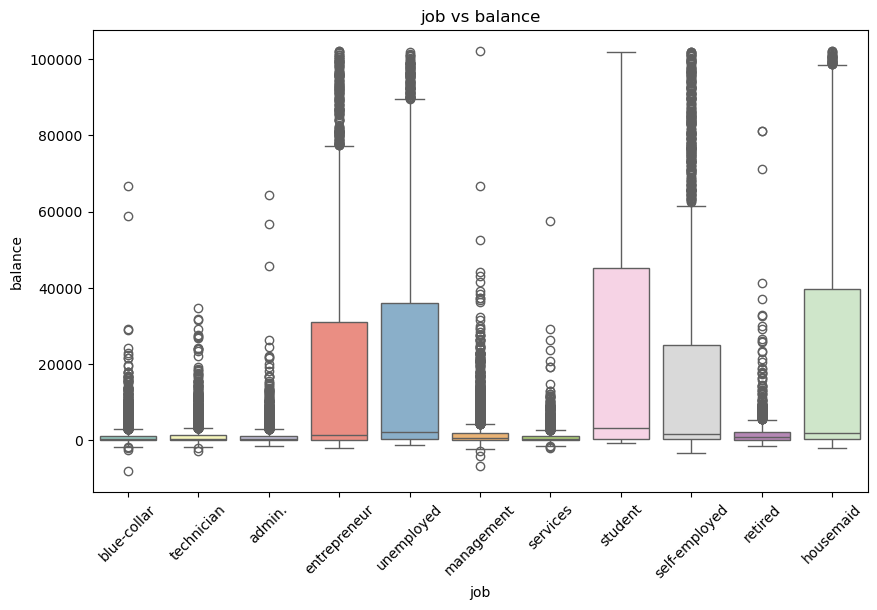

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='balance', data=df,palette='Set3')
plt.title(f"job vs balance")
plt.xlabel('job')
plt.ylabel('balance')
plt.xticks(rotation=45)
plt.show()

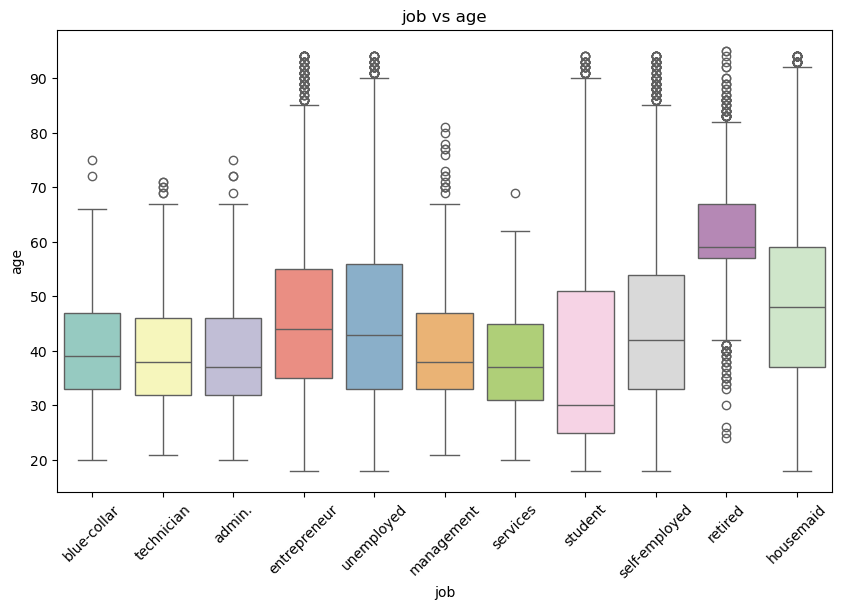

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='age', data=df,palette='Set3')
plt.title(f"job vs age")
plt.xlabel('job')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.show()

## Multivariate Analysis

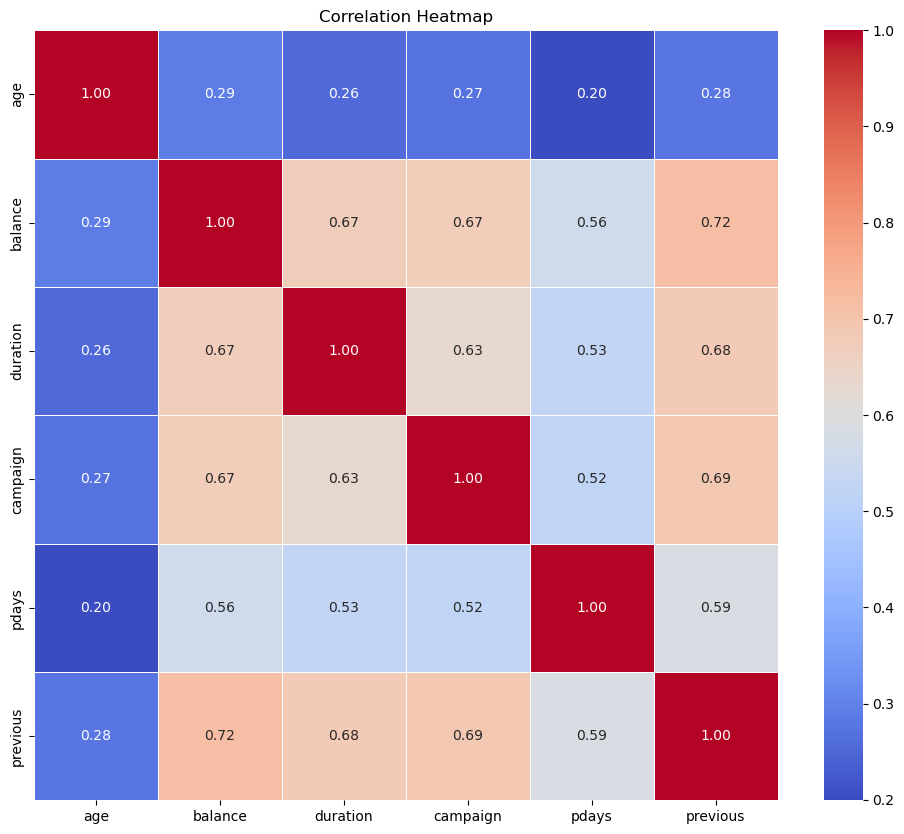

In [24]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1200x1000 with 0 Axes>

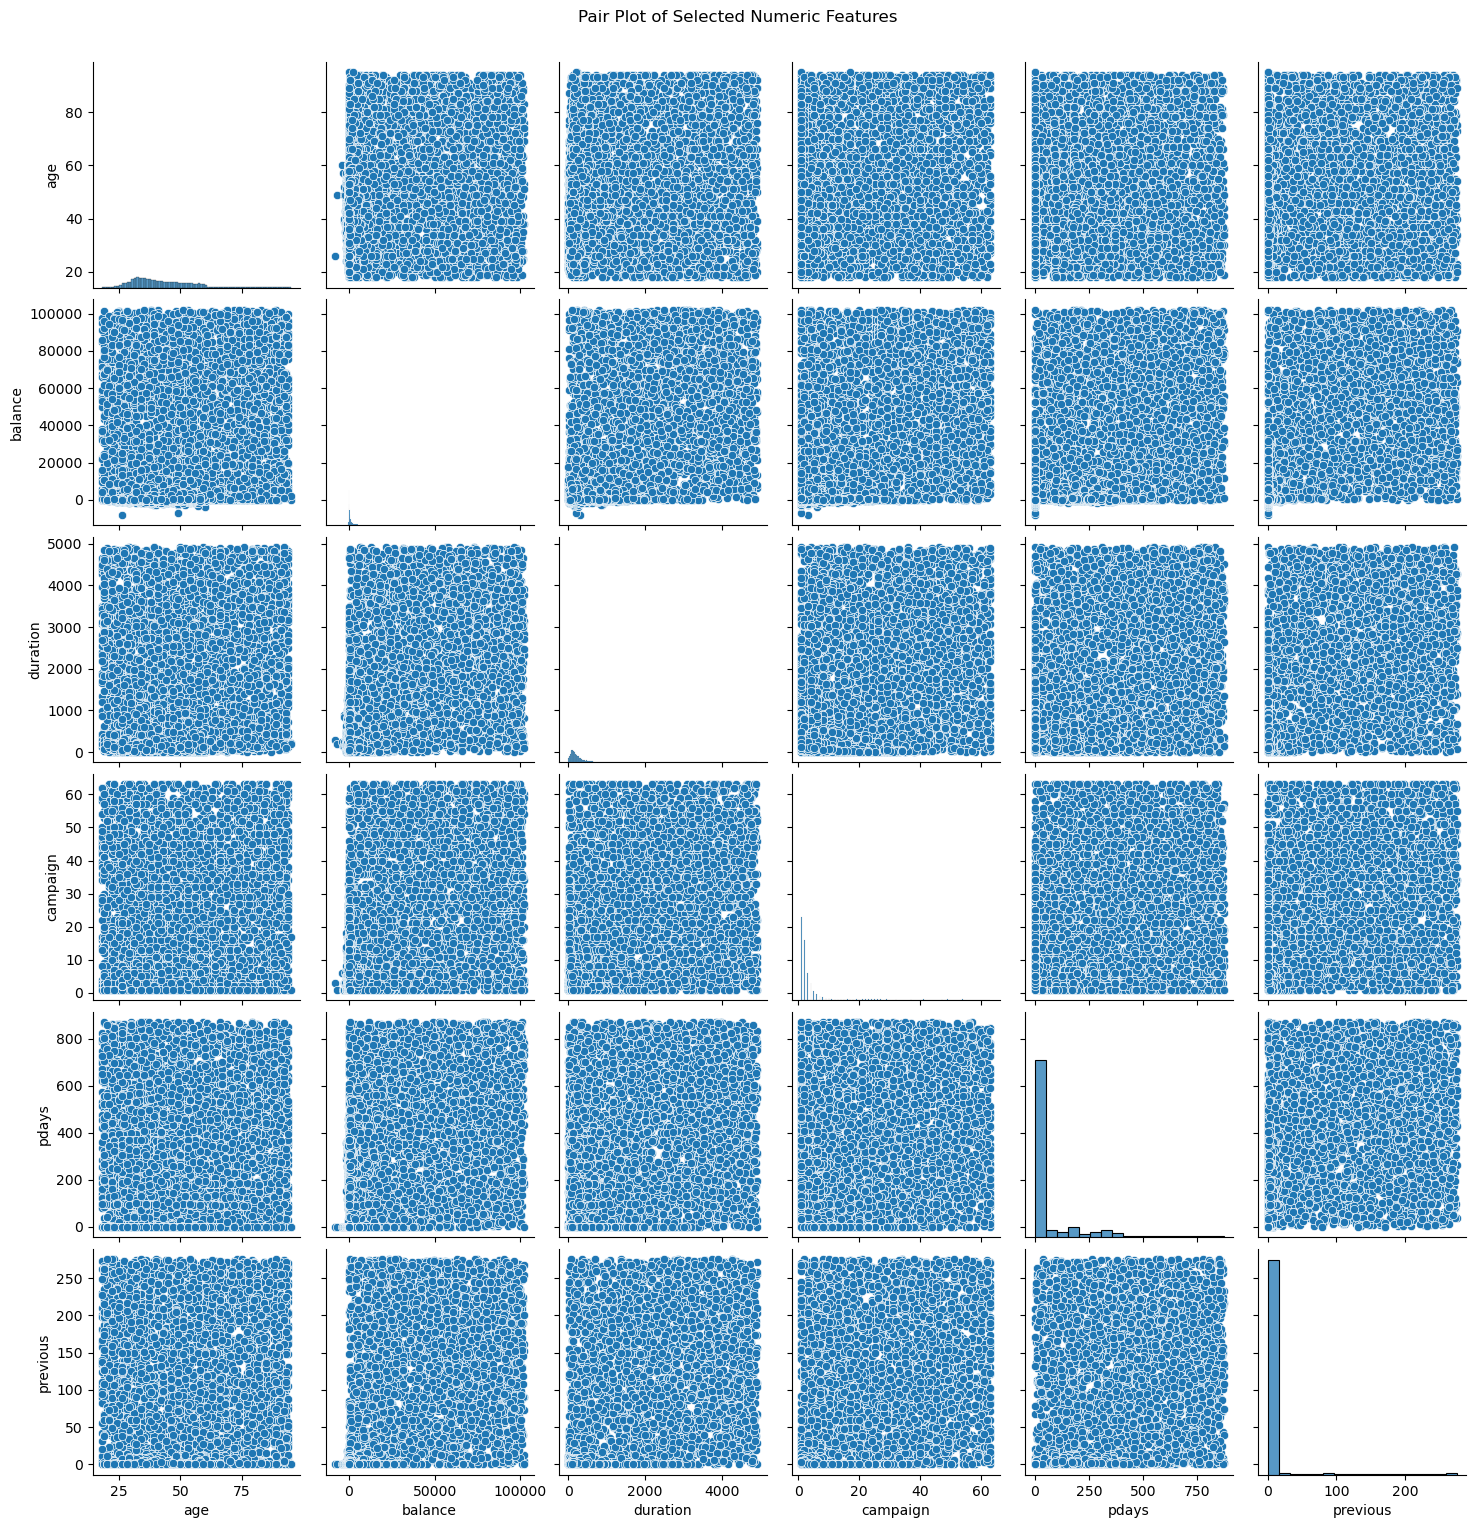

In [25]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_cols], height=2.5)
plt.suptitle("Pair Plot of Selected Numeric Features", y=1.02)
plt.show()

### Insights from the above steps

- **Age**: The age distribution is left-skewed, with most clients in older brackets (31-50+). Targeting younger age groups could diversify engagement.

- **Balance**: Majority have moderate to high balances; the campaign could focus on premium services, while low-balance clients may represent a distinct segment.

- **Contact Duration**: Long calls dominate, indicating good client engagement. Maintaining engagement length is key; analyzing short calls might offer improvement insights.

- **Campaign Success by Age Group**: Higher success is noted among older clients. Expanding effective strategies for younger groups could enhance overall results.

- **Implications for Predictive Modeling**: Skewed features like balance and duration might benefit from transformations (e.g., log or square-root) to improve model performance.


## Data Transformation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [27]:
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']

In [28]:
# Data Normalization
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])


In [29]:
# One Hot Encoding
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [30]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])


In [31]:
df_transformed = preprocessor.fit_transform(df)
numeric_feature_names = numeric_features
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=all_feature_names)
print(df_transformed.head())

        age   balance  duration  campaign     pdays  previous  job_admin.  \
0 -1.268393 -0.292989 -0.106702 -0.314334  1.607699 -0.245271         0.0   
1  0.777371 -0.298732 -0.362850 -0.415446 -0.455175 -0.267926         0.0   
2  0.147905 -0.247159 -0.147009 -0.415446 -0.455175 -0.267926         0.0   
3 -0.717610 -0.308448 -0.435663 -0.213222 -0.455175 -0.267926         1.0   
4 -0.874977 -0.324152  0.007720 -0.314334 -0.455175 -0.267926         0.0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  education_tertiary  \
0              1.0               0.0            0.0  ...                 0.0   
1              0.0               0.0            0.0  ...                 0.0   
2              1.0               0.0            0.0  ...                 0.0   
3              0.0               0.0            0.0  ...                 0.0   
4              0.0               1.0            0.0  ...                 1.0   

   education_nan  housing_no  housing_yes  loan_no  loan

## Logistic Regression

In [32]:
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression(random_state=42))])

In [33]:
df['target'] = df['target'].apply(lambda x: 1 if x == 'yes' else 0)

X = df.drop('target', axis=1)
y = df['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'poutcome'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [36]:
y_pred = model.predict(X_test)

In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      6645
           1       0.57      0.23      0.33      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843

Accuracy: 0.86


In [38]:
output = pd.DataFrame({'id': X_test.index, 'target': ['yes' if pred == 1 else 'no' for pred in y_pred]})
output.to_csv('submission.csv', index=False)

## Data Reduction 

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [40]:
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv')    

In [41]:
if 'last contact date' in train_data.columns:
    train_data = train_data.drop('last contact date', axis=1)
if 'last contact date' in test_data.columns:
    test_data = test_data.drop('last contact date', axis=1)

train_data['target'] = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)

X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_test = test_data

numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Recursive Feature Elimination (RFE)

In [42]:
# Feature Selection with RFE (using Logistic Regression as the base estimator)
numeric_feature_names = numeric_features
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Run RFE
rfe_selector = RFE(LogisticRegression(random_state=42, max_iter=500), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_train_processed, y_train)

# Get the mask of selected features
selected_features_mask = rfe_selector.support_

# Use the mask to filter original feature names
selected_features = [name for name, selected in zip(all_feature_names, selected_features_mask) if selected]

# Print the selected features
print("Selected features:", selected_features)

# If you want to see the reduced training and test dataframes:
X_train_rfe = pd.DataFrame(rfe_selector.transform(X_train_processed), columns=selected_features)
X_test_rfe = pd.DataFrame(rfe_selector.transform(X_test_processed), columns=selected_features)

print("X_train with selected features:\n", X_train_rfe.head())
print("X_test with selected features:\n", X_test_rfe.head())

Selected features: ['duration', 'job_blue-collar', 'job_retired', 'marital_married', 'education_primary', 'housing_yes', 'loan_yes', 'poutcome_failure', 'poutcome_success', 'poutcome_nan']
X_train with selected features:
    duration  job_blue-collar  job_retired  marital_married  education_primary  \
0 -0.106702              1.0          0.0              1.0                0.0   
1 -0.362850              0.0          0.0              1.0                0.0   
2 -0.147009              1.0          0.0              1.0                0.0   
3 -0.435663              0.0          0.0              1.0                0.0   
4  0.007720              0.0          0.0              0.0                0.0   

   housing_yes  loan_yes  poutcome_failure  poutcome_success  poutcome_nan  
0          1.0       0.0               0.0               0.0           0.0  
1          1.0       0.0               0.0               0.0           1.0  
2          0.0       0.0               0.0               0.0

### PCA

In [43]:
# PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)

# Create column names for the PCA components
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

# Convert the PCA-transformed data to DataFrames with labeled columns
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# Print the PCA-transformed DataFrames with component names
print("X_train with PCA components:\n", X_train_pca_df.head())
print("X_test with PCA components:\n", X_test_pca_df.head())

X_train with PCA components:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.064989  0.837035 -0.120969  0.388270  0.225809 -0.194673 -0.575749   
1 -0.466650  0.365128  0.071725 -0.122600 -0.500713 -0.251425  0.089881   
2 -0.298413  0.043492  0.718550 -0.018807  0.388079 -0.092875 -0.725106   
3 -0.536780  0.361814  0.061455 -0.109955 -0.497324 -0.245216  0.094211   
4 -0.011545 -0.833794 -0.053702 -0.281602  0.128783 -0.115956 -0.075446   

        PC8       PC9      PC10  
0  0.378944  0.073263  0.491272  
1  0.000742 -0.047669 -0.010411  
2 -0.002575  0.031387  0.000749  
3  0.006631 -0.049137 -0.009095  
4 -0.098042 -0.054744 -0.014197  
X_test with PCA components:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.543776 -0.858945 -0.131647 -0.185640  0.154509 -0.068834 -0.042579   
1 -0.553644 -0.371032  0.575975  0.166043 -0.211090 -0.152726 -0.069551   
2 -0.532161  0.276115 -0.541739 -0.599524  0.480036 -0.078410

### Ensemble learning using Voting

In [44]:
# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=500)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(probability=True, random_state=42)

model_accuracies = {}

models = {
    'Logistic Regression': log_reg,
    'Naive Bayes': naive_bayes,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svm
}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_train = model.predict(X_train_pca)
    model_accuracies[model_name] = accuracy_score(y_train, y_pred_train)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_train, y_pred_train))

voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes),
    ('svm', svm)
], voting='soft')

voting_clf.fit(X_train_pca, y_train)
y_pred_voting = voting_clf.predict(X_test_pca)
voting_accuracy = accuracy_score(y_train, voting_clf.predict(X_train_pca))
model_accuracies['Voting Classifier'] = voting_accuracy
print("\nVoting Classifier Classification Report:")
print(classification_report(y_train, voting_clf.predict(X_train_pca)))

output = pd.DataFrame({'id': X_test.index, 'target': ['yes' if pred == 1 else 'no' for pred in y_pred_voting]})

if output.shape[0] < 10000:
    extra_rows = 10000 - output.shape[0]
    extra_data = pd.DataFrame({'id': range(output.shape[0], output.shape[0] + extra_rows), 'target': 'no'})
    output = pd.concat([output, extra_data], ignore_index=True)

output.to_csv('submission.csv', index=False)

print("Model Accuracies:", model_accuracies)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     33384
           1       0.56      0.23      0.32      5827

    accuracy                           0.86     39211
   macro avg       0.72      0.60      0.62     39211
weighted avg       0.83      0.86      0.83     39211


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     33384
           1       0.42      0.46      0.44      5827

    accuracy                           0.82     39211
   macro avg       0.66      0.67      0.67     39211
weighted avg       0.83      0.82      0.83     39211


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     33384
           1       0.70      0.52      0.60      5827

    accuracy                           0.90     39211
   m

-------------